### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from itertools import combinations
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
import xgboost as xgb

### Reading the CSV data file

In [5]:
data = pd.read_csv("final.csv")
print(data.shape)

(522, 35)


### Removing of the **null** values

In [6]:
data = data.dropna()
print(data.shape)

(521, 35)


### Extracting the **mean** indices values

In [7]:
data1 = data[['BSI_mean', 'EVI_mean', 'MNDWI_mean', 'NDBI_mean', 'NDMI_mean', 'NDVI_mean', 'SAVI_mean', 'NDWI_mean', 'NDBAI_mean', 'LST_mean']]
data1

,BSI_mean,EVI_mean,MNDWI_mean,NDBI_mean,NDMI_mean,NDVI_mean,SAVI_mean,NDWI_mean,NDBAI_mean,LST_mean
0,0.039680,0.210020,-0.316366,-0.048175,0.048175,0.306342,0.205461,-0.354133,-0.640810,33.017602
1,0.099487,0.169179,-0.391396,0.008665,-0.008665,0.287868,0.177909,-0.383450,-0.673673,39.616619
2,0.025270,0.229553,-0.354138,-0.050555,0.050555,0.353781,0.223363,-0.392053,-0.659257,31.384109
3,0.054472,0.207681,-0.340607,-0.025959,0.025959,0.301510,0.203125,-0.357769,-0.625262,34.086863
4,-0.031997,0.278178,-0.358356,-0.104633,0.104633,0.431116,0.264810,-0.440143,-0.686251,28.662654
...,...,...,...,...,...,...,...,...,...,...
517,0.052930,0.137796,-0.299409,-0.020125,0.020125,0.272341,0.137639,-0.317223,-0.757388,34.023674
518,0.063561,0.206526,-0.420870,-0.020951,0.020951,0.373076,0.214809,-0.436969,-0.694919,35.749643
519,0.131668,0.208965,-0.460818,0.058727,-0.058727,0.304498,0.216835,-0.409299,-0.562208,38.788682
520,0.005290,0.305526,-0.458551,-0.082953,0.082953,0.539540,0.305048,-0.520377,-0.690708,27.523860


### Plotting the heatmap

<AxesSubplot:>

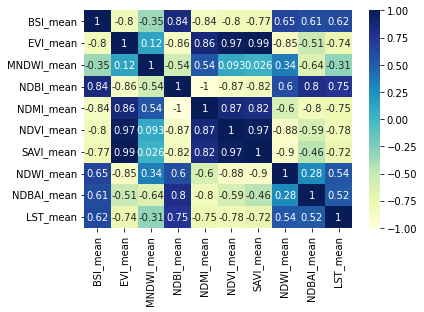

In [8]:
sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)

### Splitting the dataset into Train and Test

In [9]:
# Split data into features (X) and target variable (y)
X = data[['BSI_mean', 'EVI_mean', 'MNDWI_mean', 'NDBI_mean', 'NDMI_mean', 'NDVI_mean', 'SAVI_mean', 'NDWI_mean', 'NDBAI_mean']]
y = data['LST_mean']

# Split the data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### 1. Linear Regression

In [12]:
best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        X_train_subset = X_train[list(features)]
        X_val_subset = X_val[list(features)]
        
        # Create and train the linear regression model
        model = LinearRegression()
        model.fit(X_train_subset, y_train)
        
        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)
        
        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        
        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)

Best R2 value: 0.7720133710591022
Training R2 value: 0.798133218858156
Mean Squared Error (MSE): 6.420445821520478
Mean Absolute Error (MAE): 1.731819697942487
Best features: ('BSI_mean', 'MNDWI_mean', 'NDVI_mean', 'SAVI_mean', 'NDBAI_mean')


### 2. Polynomial Regression

In [52]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_val_df = pd.DataFrame(X_val, columns=X.columns)

best_r2 = 0.0
best_degree = 0
best_features = None

# Try different combinations of columns and polynomial degrees
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        for degree in range(1, 6):  # Try polynomial degrees from 1 to 5
            X_train_subset = X_train_df[list(features)]
            X_val_subset = X_val_df[list(features)]

            # Create polynomial features
            polynomial_features = PolynomialFeatures(degree=degree)
            X_train_poly = polynomial_features.fit_transform(X_train_subset)
            X_val_poly = polynomial_features.transform(X_val_subset)

            # Create and train the linear regression model with polynomial features
            model = LinearRegression()
            model.fit(X_train_poly, y_train)

            # Make predictions on the validation set
            y_pred = model.predict(X_val_poly)

            # Calculate evaluation metrics
            r2 = r2_score(y_val, y_pred)
            train_r2 = r2_score(y_train, model.predict(X_train_poly))
            mse = mean_squared_error(y_val, y_pred)
            mae = mean_absolute_error(y_val, y_pred)

            # Check if current combination of features and degree gives better R2 score
            if r2 > best_r2:
                best_r2 = r2
                best_degree = degree
                best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best polynomial degree:", best_degree)
print("Best features:", best_features)


Best R2 value: 0.8586027966802722
Training R2 value: 1.0
Mean Squared Error (MSE): 1103183.6890271576
Mean Absolute Error (MAE): 144.92649694963998
Best polynomial degree: 2
Best features: ('MNDWI_mean', 'NDBI_mean', 'NDMI_mean', 'NDVI_mean', 'SAVI_mean', 'NDWI_mean', 'NDBAI_mean')


### 3. Random Forest Regressor

In [18]:
best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        X_train_subset = X_train[list(features)]
        X_val_subset = X_val[list(features)]

        # Create and train the random forest regressor model
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train_subset, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)

        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.7188322358716752
Training R2 value: 0.9667470908916171
Mean Squared Error (MSE): 9.027306164048472
Mean Absolute Error (MAE): 1.9152262749551359
Best features: ('EVI_mean', 'MNDWI_mean', 'NDVI_mean', 'SAVI_mean', 'NDWI_mean')


### 4. Support Vector Regressor

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        # Get the indices of the selected features
        feature_indices = [X.columns.get_loc(feature) for feature in features]
        
        # Select the corresponding subset of scaled features
        X_train_subset = X_train_scaled[:, feature_indices]
        X_val_subset = X_val_scaled[:, feature_indices]

        # Create and train the support vector regressor model
        model = SVR()
        model.fit(X_train_subset, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)

        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.7187574079451111
Training R2 value: 0.7439661676293376
Mean Squared Error (MSE): 8.792066629250447
Mean Absolute Error (MAE): 2.0022890137324936
Best features: ('BSI_mean', 'NDVI_mean', 'SAVI_mean', 'NDWI_mean')


### 5. Ridge Regression

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        # Get the indices of the selected features
        feature_indices = [X.columns.get_loc(feature) for feature in features]
        
        # Select the corresponding subset of scaled features
        X_train_subset = X_train_scaled[:, feature_indices]
        X_val_subset = X_val_scaled[:, feature_indices]

        # Create and train the Ridge regression model
        model = Ridge(alpha=0.1, random_state=42)
        model.fit(X_train_subset, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)

        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.7704733248895206
Training R2 value: 0.7980626314774321
Mean Squared Error (MSE): 6.459242117571475
Mean Absolute Error (MAE): 1.7341918862092043
Best features: ('BSI_mean', 'MNDWI_mean', 'NDVI_mean', 'SAVI_mean', 'NDBAI_mean')


### 6. Lasso Regression

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        # Get the indices of the selected features
        feature_indices = [X.columns.get_loc(feature) for feature in features]
        
        # Select the corresponding subset of scaled features
        X_train_subset = X_train_scaled[:, feature_indices]
        X_val_subset = X_val_scaled[:, feature_indices]

        # Create and train the Ridge regression model
        model = Lasso(alpha=0.1, random_state=42)
        model.fit(X_train_subset, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)

        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.6368234559007442
Training R2 value: 0.7258865650066841
Mean Squared Error (MSE): 10.250762771609994
Mean Absolute Error (MAE): 2.012480088740237
Best features: ('MNDWI_mean', 'NDBI_mean', 'NDVI_mean', 'NDWI_mean', 'NDBAI_mean')


### 7. Kernel Ridge

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        # Get the indices of the selected features
        feature_indices = [X.columns.get_loc(feature) for feature in features]
        
        # Select the corresponding subset of scaled features
        X_train_subset = X_train_scaled[:, feature_indices]
        X_val_subset = X_val_scaled[:, feature_indices]

        # Create and train the Ridge regression model
        model = KernelRidge(alpha=1.0, kernel='rbf')
        model.fit(X_train_subset, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)

        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.7909054744528813
Training R2 value: 0.6885771691795833
Mean Squared Error (MSE): 7.749060745836938
Mean Absolute Error (MAE): 2.145950234438521
Best features: ('MNDWI_mean', 'NDBI_mean', 'NDMI_mean', 'NDVI_mean', 'SAVI_mean')


### 8. Gradient Boost

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        # Get the indices of the selected features
        feature_indices = [X.columns.get_loc(feature) for feature in features]
        
        # Select the corresponding subset of scaled features
        X_train_subset = X_train_scaled[:, feature_indices]
        X_val_subset = X_val_scaled[:, feature_indices]

        # Create and train the Ridge regression model
        model = GradientBoostingRegressor(random_state=42)
        model.fit(X_train_subset, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)

        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.7223135311626754
Training R2 value: 0.9412423497699499
Mean Squared Error (MSE): 8.298562003295796
Mean Absolute Error (MAE): 1.9954853149277236
Best features: ('BSI_mean', 'EVI_mean', 'MNDWI_mean', 'NDMI_mean', 'NDVI_mean')


### 9. XG Boost

In [48]:
best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        feature_indices = [X.columns.get_loc(feature) for feature in features]
        X_train_subset = X_train[:, feature_indices]
        X_val_subset = X_val[:, feature_indices]

        # Prepare the data in the required format for XGBoost
        dtrain = xgb.DMatrix(X_train_subset, label=y_train)
        dval = xgb.DMatrix(X_val_subset, label=y_val)

        # Define the parameters for the XGBoost model
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'seed': 42
        }

        # Train the XGBoost model
        model = xgb.train(params, dtrain)
        y_pred = model.predict(dval)

        # Compute evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(dtrain))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Update the best R2 score and selected features if a better result is found
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.7281324795044264
Training R2 value: 0.886475456715604
Mean Squared Error (MSE): 10.159158871125802
Mean Absolute Error (MAE): 2.229420693182632
Best features: ('MNDWI_mean', 'NDBI_mean', 'SAVI_mean')


### 10. Decison Tree Regressor

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        # Get the indices of the selected features
        feature_indices = [X.columns.get_loc(feature) for feature in features]
        
        # Select the corresponding subset of scaled features
        X_train_subset = X_train_scaled[:, feature_indices]
        X_val_subset = X_val_scaled[:, feature_indices]

        # Create and train the Ridge regression model
        model = DecisionTreeRegressor(random_state=42)
        model.fit(X_train_subset, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)

        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.6198740508036413
Training R2 value: 1.0
Mean Squared Error (MSE): 15.65144895540603
Mean Absolute Error (MAE): 2.5673934658946633
Best features: ('NDVI_mean', 'NDWI_mean')


### 11. MLP Regressor

In [42]:
import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

best_r2 = 0.0
best_features = None

# Try different combinations of columns
for num_features in range(1, len(X.columns) + 1):
    for features in combinations(X.columns, num_features):
        # Get the indices of the selected features
        feature_indices = [X.columns.get_loc(feature) for feature in features]
        
        # Select the corresponding subset of scaled features
        X_train_subset = X_train_scaled[:, feature_indices]
        X_val_subset = X_val_scaled[:, feature_indices]

        # Create and train the Ridge regression model
        model = MLPRegressor(random_state=42, solver='lbfgs')
        model.fit(X_train_subset, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val_subset)

        # Calculate evaluation metrics
        r2 = r2_score(y_val, y_pred)
        train_r2 = r2_score(y_train, model.predict(X_train_subset))
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)

        # Check if current combination of features gives better R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_features = features

# Print the results
print("Best R2 value:", best_r2)
print("Training R2 value:", train_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Best features:", best_features)


Best R2 value: 0.8525260247677593
Training R2 value: 0.9291038355597872
Mean Squared Error (MSE): 5.977707022128167
Mean Absolute Error (MAE): 1.662999020900779
Best features: ('BSI_mean', 'EVI_mean', 'MNDWI_mean', 'NDMI_mean', 'NDVI_mean', 'SAVI_mean', 'NDBAI_mean')


## Final Results

|Model| MAE | MSE | R^2 score | Training R^2 Score| Best Features |
|-----|----|----|----|----|----|
|Linear Regression|1.731819697942487|6.420445821520478|0.7720133710591022|0.798133218858156|'BSI_mean', 'MNDWI_mean', 'NDVI_mean', 'SAVI_mean', 'NDBAI_mean'|
|Polynomial Regression|144.92649694963998|1103183.6890271576|0.8586027966802722|1.0|'MNDWI_mean', 'NDBI_mean', 'NDMI_mean', 'NDVI_mean', 'SAVI_mean', 'NDWI_mean', 'NDBAI_mean'|
|Random Forest Regressor|1.9152262749551359|9.027306164048472|0.7188322358716752|0.9667470908916171|'EVI_mean', 'MNDWI_mean', 'NDVI_mean', 'SAVI_mean', 'NDWI_mean'|
|Support Vector Regressor|2.0022890137324936|8.792066629250447|0.7187574079451111|0.7439661676293376|'BSI_mean', 'NDVI_mean', 'SAVI_mean', 'NDWI_mean'|
|Ridge Regression|1.7341918862092043|6.459242117571475|0.7704733248895206|0.7980626314774321|'BSI_mean', 'MNDWI_mean', 'NDVI_mean', 'SAVI_mean', 'NDBAI_mean'|
|Lasso Regression|2.012480088740237|10.250762771609994|0.6368234559007442|0.7258865650066841|'MNDWI_mean', 'NDBI_mean', 'NDVI_mean', 'NDWI_mean', 'NDBAI_mean'|
|Kernel Ridge|2.145950234438521|7.749060745836938|0.7909054744528813|0.6885771691795833|'MNDWI_mean', 'NDBI_mean', 'NDMI_mean', 'NDVI_mean', 'SAVI_mean'|
|Gradient Boost|1.9954853149277236|8.298562003295796|0.7223135311626754|0.9412423497699499|'BSI_mean', 'EVI_mean', 'MNDWI_mean', 'NDMI_mean', 'NDVI_mean'|
|XG Boost|2.229420693182632|10.159158871125802|0.7281324795044264|0.886475456715604|'MNDWI_mean', 'NDBI_mean', 'SAVI_mean'|
|Decision Tree Regressor|2.5673934658946633|15.65144895540603|0.6198740508036413|1.0|'NDVI_mean', 'NDWI_mean'|
|MLP Regressor|1.662999020900779|5.977707022128167|0.8525260247677593|0.9291038355597872|'BSI_mean', 'EVI_mean', 'MNDWI_mean', 'NDMI_mean', 'NDVI_mean', 'SAVI_mean', 'NDBAI_mean'|